In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
N = 10**5

In [55]:
ip = np.random.randn(N) > 0.5 
ip = np.array(ip) 

In [56]:
s = 2 * ip - 1        

s = np.array(s) 

In [57]:
eb_no_db = np.arange(30) 

In [58]:
bit_error_rate_zero = np.zeros(len(eb_no_db))
bti_error_rate_MMSE = np.zeros(len(eb_no_db))

In [59]:
def Zero_Forcing_SIC():

    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        received_bits_list = []
        
        
        
        for ii in range(N//2):
            
            h11 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h12 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h21 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h22 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n1 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n2 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            x1 = s[2 * ii]
            
            x2 = s[2 * ii + 1]
            
            H = np.array([[h11, h12], [h21, h22]])
            
            n = np.array([[n1], [n2]])
            
            x = np.array([[x1], [x2]])
            
            Hx = np.matmul(H, x)
            
            y = (1 / np.sqrt(2)) * Hx + n * (10 ** (-eb_no_db[jj] / 20))
            
            H_conjugate = np.conjugate(H)
            
            H_Hermitian = np.transpose(H_conjugate)
            
            H_Hermitian_H = np.matmul(H_Hermitian, H)
            
            rank = np.linalg.matrix_rank(H_Hermitian_H)
            
            invertible = True if np.all(np.isfinite(np.linalg.inv(H_Hermitian_H))) else False
            
            H_inverse = np.linalg.inv(H_Hermitian_H)
            
            W = np.matmul(H_inverse, H_Hermitian)
            
            x_hat = np.matmul(W, y)
            
            # upto zero forcing algorithm
            
            
            Px1 = np.abs(h11)**2 + np.abs(h21)**2
            
            Px2 = np.abs(h12)**2 + np.abs(h22)**2
            
            
            if Px1 > Px2:
                
                h1 = np.array([[h11],[h21]]) #x1 travel channel
                
                h2 = np.array([[h12],[h22]]) # remaining channel after substract
                
                x1_hat = x_hat[0,0] #after zero forcing x1 bit 
                
                hx = np.dot(h1,x1_hat)
                
                r = y - hx # substracting x1 bit with channel
                
                #finding remaining channel pseudo_inverse
                
                h2_conjugate = np.conjugate(h2)
            
                h2_Hermitian = np.transpose(h2_conjugate)
            
                h2_Hermitian_h2 = np.matmul(h2_Hermitian, h2)
            
                h2_inverse = np.linalg.inv(h2_Hermitian_h2)
            
                equalize_value = np.matmul(h2_inverse, h2_Hermitian)
                
                x2_hat = np.matmul(equalize_value,r)
                
                received_bits = np.real(x2_hat > 0)
                
                
                m = x1_hat > 0 
                
                n = received_bits[0, 0]   
                
                received_bits_list.append(m)
                
                received_bits_list.append(n)
                
            elif Px1 < Px2 :
                
                h2 = np.array([[h12],[h22]])
                
                h1 = np.array([[h11],[h21]])
                
                x2_hat = x_hat[1,0]
                
                hx = np.dot(h2,x2_hat)
                
                r = y - hx
                
                h1_conjugate = np.conjugate(h1)
            
                h1_Hermitian = np.transpose(h1_conjugate)
            
                h1_Hermitian_h1 = np.matmul(h1_Hermitian, h1)
            
                h1_inverse = np.linalg.inv(h1_Hermitian_h1)
            
                equalize_value = np.matmul(h1_inverse, h1_Hermitian)
                
                x1_hat = np.matmul(equalize_value,r)
                
                received_bits = np.real(x1_hat > 0)
                
                m = received_bits[0, 0]
                
                n = x2_hat > 0
                
                received_bits_list.append(m)
                
                received_bits_list.append(n)
            
        nErr = np.sum(ip != received_bits_list)
#         print("received_bits_list",len(received_bits_list))
#         print("ip",len(ip))
        bit_error_rate_zero[jj] = nErr / N

    
    return bit_error_rate_zero

            
            
            

In [60]:
def MMSE_DFE():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        received_bits_list = []
        
        
        
        for ii in range(N//2):
            
            h11 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h12 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h21 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h22 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n1 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n2 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            x1 = s[2 * ii]
            
            x2 = s[2 * ii + 1]
            
            H = np.array([[h11, h12], [h21, h22]])
            
            n = np.array([[n1], [n2]])
            
            x = np.array([[x1], [x2]])
            
            Hx = np.matmul(H, x)
            
            y = (1 / np.sqrt(2)) * Hx + n * (10 ** (-eb_no_db[jj] / 20))
            
            H_conjugate = np.conjugate(H)
            
            H_Hermitian = np.transpose(H_conjugate)
            
            H_Hermitian_H = np.matmul(H_Hermitian, H)
            
            rank = np.linalg.matrix_rank(H_Hermitian_H)
            
            invertible = True if np.all(np.isfinite(np.linalg.inv(H_Hermitian_H))) else False
            
            H_inverse = np.linalg.inv(H_Hermitian_H)
            
            W = np.matmul(H_inverse, H_Hermitian)
            
            x_hat = np.matmul(W, y)
            
            # upto MMSE algorithm
            
            
            Px1 = np.abs(h11)**2 + np.abs(h21)**2
            
            Px2 = np.abs(h12)**2 + np.abs(h22)**2
            
            
            if Px1 > Px2:
                
                h1 = np.array([[h11],[h21]]) #x1 travel channel
                
                h2 = np.array([[h12],[h22]]) # remaining channel after substract
                
                x1_hat = x_hat[0,0] #after zero forcing x1 bit 
                
                hx = np.dot(h1,x1_hat)
                
                r = y - hx # substracting x1 bit with channel
                
                #finding remaining channel pseudo_inverse
                
                h2_conjugate = np.conjugate(h2)
            
                h2_Hermitian = np.transpose(h2_conjugate)
            
                h2_Hermitian_h2 = np.matmul(h2_Hermitian, h2)
                
                identity_matrix = np.eye(1)
                
                snr_inverse = (1 / (10 ** (eb_no_db[jj] / 10)))
                
                h2_hermitian_h2 = h2_Hermitian_h2 + identity_matrix * snr_inverse
                
                h2_inverse = np.linalg.inv(h2_Hermitian_h2)
            
                equalize_value = np.matmul(h2_inverse, h2_Hermitian)
                
                x2_hat = np.matmul(equalize_value,r)
                
                received_bits = np.real(x2_hat > 0)
                
                
                m = x1_hat > 0 
                
                n = received_bits[0, 0]   
                
                received_bits_list.append(m)
                
                received_bits_list.append(n)
                
            elif Px1 < Px2 :
                
                h2 = np.array([[h12],[h22]])
                
                h1 = np.array([[h11],[h21]])
                
                x2_hat = x_hat[1,0]
                
                hx = np.dot(h2,x2_hat)
                
                r = y - hx
                
                h1_conjugate = np.conjugate(h1)
            
                h1_Hermitian = np.transpose(h1_conjugate)
            
                h1_Hermitian_h1 = np.matmul(h1_Hermitian, h1)
                
                identity_matrix = np.eye(1)
                
                snr_inverse = (1 / (10 ** (eb_no_db[jj] / 10)))
                
                h1_Hermitian_h1 = h1_Hermitian_h1 + identity_matrix * snr_inverse
                
                h1_inverse = np.linalg.inv(h1_Hermitian_h1)
            
                equalize_value = np.matmul(h1_inverse, h1_Hermitian)
                
                x1_hat = np.matmul(equalize_value,r)
                
                received_bits = np.real(x1_hat > 0)
                
                m = received_bits[0, 0]
                
                n = x2_hat > 0
                
                received_bits_list.append(m)
                
                received_bits_list.append(n)
            
        nErr = np.sum(ip != received_bits_list)

        bti_error_rate_MMSE[jj] = nErr / N

    
    return bti_error_rate_MMSE

            

[0.2828  0.24942 0.21727 0.18565 0.15653 0.12888 0.10546 0.08644 0.06853
 0.0556  0.04403 0.03516 0.02908 0.02168 0.01775 0.01381 0.01145 0.00945
 0.00749 0.00581 0.00448 0.00343 0.0029  0.00215 0.00162 0.00159 0.00096
 0.00083 0.00056 0.00046]
[0.28109 0.25111 0.21658 0.18609 0.15639 0.12791 0.10618 0.08318 0.06755
 0.05352 0.04422 0.03567 0.02819 0.02328 0.01773 0.01416 0.01154 0.00914
 0.00725 0.00539 0.00445 0.00341 0.00261 0.0022  0.0019  0.00108 0.00121
 0.00079 0.00075 0.00057]


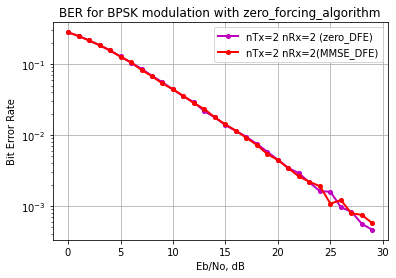

In [61]:
result_zero_DFE = Zero_Forcing_SIC()

resutl_MMSE_DFE = MMSE_DFE()
print(result_zero_DFE)
print(resutl_MMSE_DFE)
plt.figure()
plt.semilogy(eb_no_db, result_zero_DFE, 'mo-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (zero_DFE)')
plt.semilogy(eb_no_db,resutl_MMSE_DFE,'ro-',linewidth=2, markersize = 4,label = 'nTx=2 nRx=2(MMSE_DFE)' )
plt.grid(True)
plt.legend()
plt.xlabel('Eb/No, dB')
plt.ylabel('Bit Error Rate')
plt.title('BER for BPSK modulation with zero_forcing_algorithm')
plt.show()